In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
print("Upload an image for corner detection:")
uploaded = files.upload()

Upload an image for corner detection:


Saving corner detection.png to corner detection.png


In [ ]:
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray_image)

In [ ]:
Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

In [ ]:
Ixx = Ix ** 2
Iyy = Iy ** 2
Ixy = Ix * Iy

In [ ]:
gaussian_kernel_size = 5
Ixx = cv2.GaussianBlur(Ixx, (gaussian_kernel_size, gaussian_kernel_size), sigmaX=1)
Iyy = cv2.GaussianBlur(Iyy, (gaussian_kernel_size, gaussian_kernel_size), sigmaX=1)
Ixy = cv2.GaussianBlur(Ixy, (gaussian_kernel_size, gaussian_kernel_size), sigmaX=1)

In [ ]:
k = 0.04
det_M = (Ixx * Iyy) - (Ixy ** 2)
trace_M = Ixx + Iyy
harris_response = det_M - k * (trace_M ** 2)

In [ ]:
corner_threshold = 0.01 * harris_response.max()
corners = harris_response > corner_threshold

In [ ]:
image_with_corners = image.copy()
image_with_corners[corners] = [0, 0, 255]

In [ ]:
def display_image(title, image, cmap='gray'):
    plt.figure(figsize=(8, 6))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

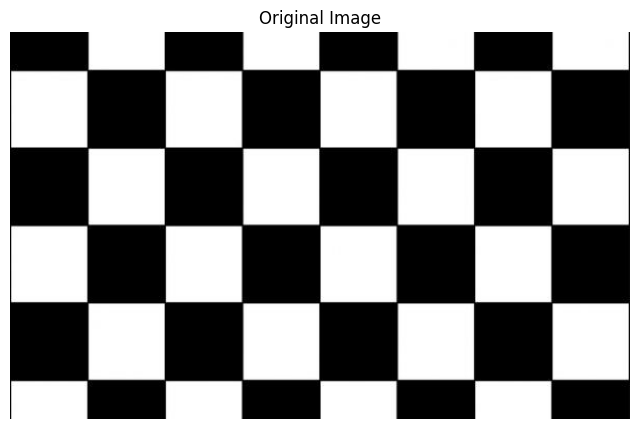

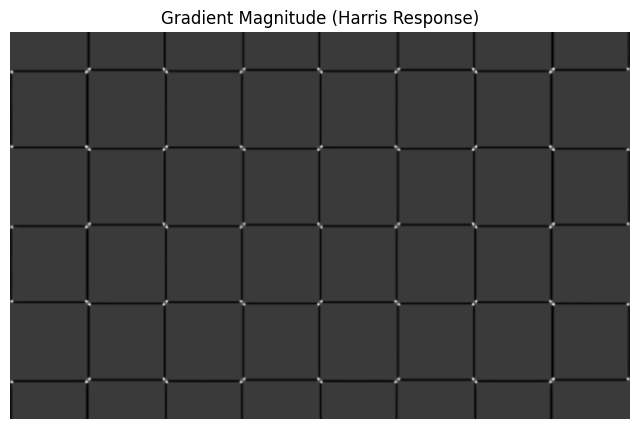

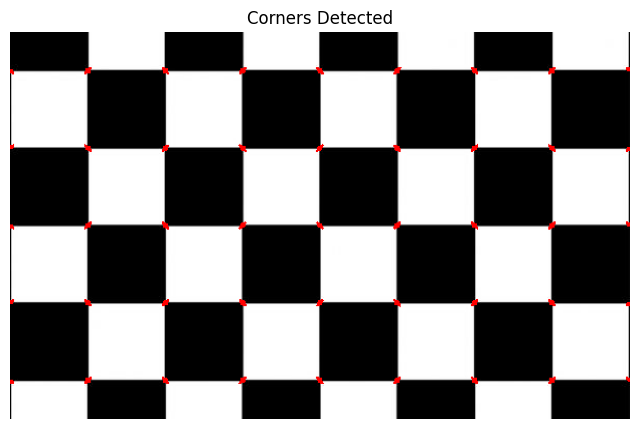

In [ ]:
display_image("Original Image", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
display_image("Gradient Magnitude (Harris Response)", harris_response)
display_image("Corners Detected", cv2.cvtColor(image_with_corners, cv2.COLOR_BGR2RGB))